<h1 style="text-align: center;">Taller 1<h1\>
<h2 style="text-align: center;">Universidad Nacional de Colombia<h2\>
<h2 style="text-align: center;">Tecnicas de Inteligencia Artificial<h2\>
<h2 style="text-align: center;">2022-1<h2\>
<h2 style="text-align: center;">15 de marzo de 2022<h2\>
<h2 style="text-align: center;">Camilo Esteban Zambrano - Brian Camilo Saiz<h2\>

In [54]:
# Se importan las librerias
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

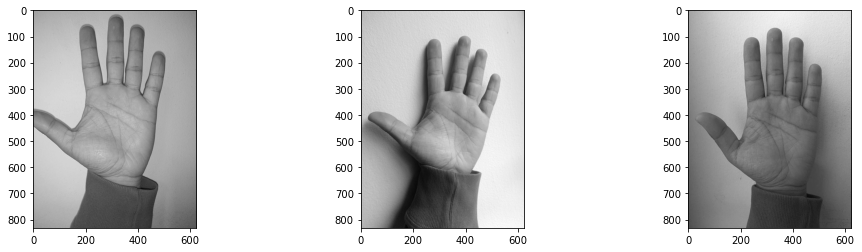

In [55]:
# Se cargan las imagenes
interior = cv2.imread("fig/interior.jpg", 0)
soleado = cv2.imread("fig/soleado.jpg", 0)
sombra = cv2.imread("fig/sombra.jpg", 0)

# Se muestran las imagenes
fig, ax = plt.subplots(1, 3)
ax[0].imshow(interior, cmap="gray")
ax[1].imshow(soleado, cmap="gray")
ax[2].imshow(sombra, cmap="gray")
fig.set_figwidth(15)
plt.subplots_adjust(wspace=0.8)

In [74]:
def histogramas(bins):
    # Se calculan los histogramas
    hist_interior = cv2.calcHist([interior],[0],None,[bins],[0,256])
    hist_soleado = cv2.calcHist([soleado],[0],None,[bins],[0,256])
    hist_sombra = cv2.calcHist([sombra],[0],None,[bins],[0,256])
    
    # Se normalizan los histogramas
    cv2.normalize(hist_interior ,hist_interior , 0, 255, cv2.NORM_MINMAX)
    cv2.normalize(hist_soleado ,hist_soleado , 0, 255, cv2.NORM_MINMAX)
    cv2.normalize(hist_sombra ,hist_sombra , 0, 255, cv2.NORM_MINMAX)
    
    # Se calcula la correlación
    correlation12 = cv2.compareHist(hist_interior, hist_soleado, 0)
    correlation13 = cv2.compareHist(hist_interior, hist_sombra, 0)
    correlation23 = cv2.compareHist(hist_soleado, hist_sombra, 0)
    
    # Se calcula la Chi cuadrado
    chisqrt12 = cv2.compareHist(hist_interior, hist_soleado, 1)
    chisqrt13 = cv2.compareHist(hist_interior, hist_sombra, 1)
    chisqrt23 = cv2.compareHist(hist_soleado, hist_sombra, 1)
    
    # Se calcula la intersección
    intersection12 = cv2.compareHist(hist_interior, hist_soleado, 2)
    intersection13 = cv2.compareHist(hist_interior, hist_sombra, 2)
    intersection23 = cv2.compareHist(hist_soleado, hist_sombra, 2)
    
    # Se calcula la Bhattacharyya
    bhattacharyya12 = cv2.compareHist(hist_interior, hist_soleado, 3)
    bhattacharyya13 = cv2.compareHist(hist_interior, hist_sombra, 3)
    bhattacharyya23 = cv2.compareHist(hist_soleado, hist_sombra, 3)
    
    # Se imprimen los histogramas
    fig, ax = plt.subplots(1, 3)
    ax[0].plot(hist_interior)
    ax[0].set_title("Interior con " + str(bins) + " bins")
    ax[1].plot(hist_soleado)
    ax[1].set_title("Soleado con " + str(bins) + " bins")
    ax[2].plot(hist_sombra) 
    ax[2].set_title("Sombra con " + str(bins) + " bins")
    fig.set_figwidth(15)
    plt.subplots_adjust(wspace=0.8)
    
    # Se imprimen lor valores para las diferentes relaciones entre los histogramas
    print("-"*20 + f"{bins} bins" + "-"*20)
    print(f"Correlación entre Interior con Soleado: {correlation12:.2f}")
    print(f"Correlación entre Interior con Sombra: {correlation13:.2f}")
    print(f"Correlación entre Soleado con Sombra: {correlation23:.2f}")
    print("\n")
    print(f"Chi cuadrado entre Interior con Soleado: {chisqrt12:.2f}")
    print(f"Chi cuadrado entre Interior con Sombra: {chisqrt13:.2f}")
    print(f"Chi cuadrado entre Soleado con Sombra: {chisqrt23:.2f}")
    print("\n")
    print(f"Intersección entre Interior con Soleado: {intersection12:.2f}")
    print(f"Intersección entre Interior con Sombra: {intersection13:.2f}")
    print(f"Intersección entre Soleado con Sombra: {intersection23:.2f}")
    print("\n")
    print(f"Bhattacharyya entre Interior con Soleado: {bhattacharyya12:.2f}")
    print(f"Bhattacharyya entre Interior con Sombra: {bhattacharyya13:.2f}")
    print(f"Bhattacharyya entre Soleado con Sombra: {bhattacharyya23:.2f}")
    print("\n")

--------------------2 bins--------------------
Correlación entre Interior con Soleado: 1.00
Correlación entre Interior con Sombra: -1.00
Correlación entre Soleado con Sombra: -1.00


Chi cuadrado entre Interior con Soleado: 0.00
Chi cuadrado entre Interior con Sombra: 255.00
Chi cuadrado entre Soleado con Sombra: 255.00


Intersección entre Interior con Soleado: 255.00
Intersección entre Interior con Sombra: 0.00
Intersección entre Soleado con Sombra: 0.00


Bhattacharyya entre Interior con Soleado: 0.00
Bhattacharyya entre Interior con Sombra: 1.00
Bhattacharyya entre Soleado con Sombra: 1.00


--------------------8 bins--------------------
Correlación entre Interior con Soleado: 0.11
Correlación entre Interior con Sombra: -0.06
Correlación entre Soleado con Sombra: -0.35


Chi cuadrado entre Interior con Soleado: 117378.13
Chi cuadrado entre Interior con Sombra: 3709.48
Chi cuadrado entre Soleado con Sombra: 1946.24


Intersección entre Interior con Soleado: 353.03
Intersección entre

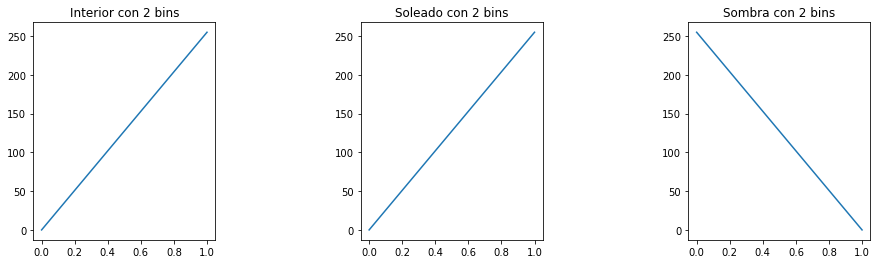

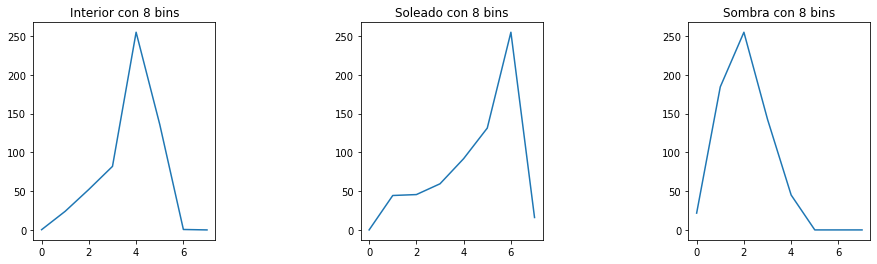

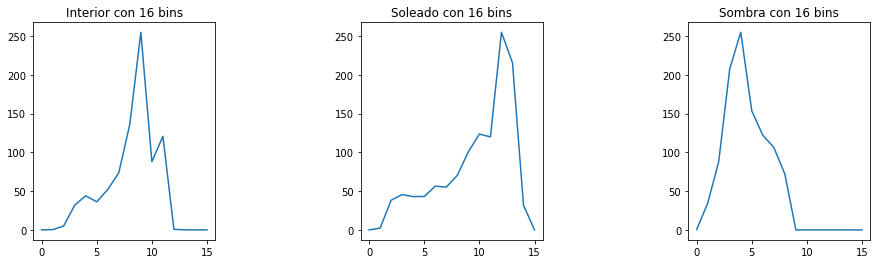

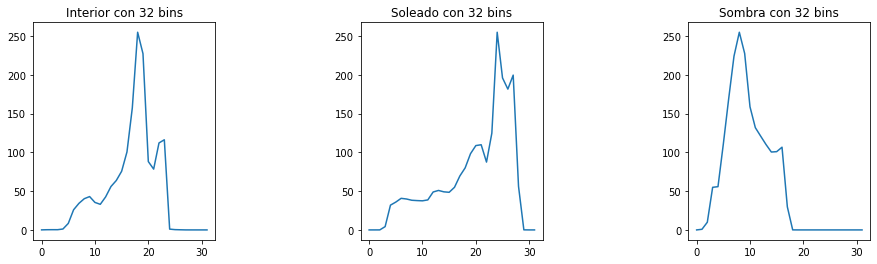

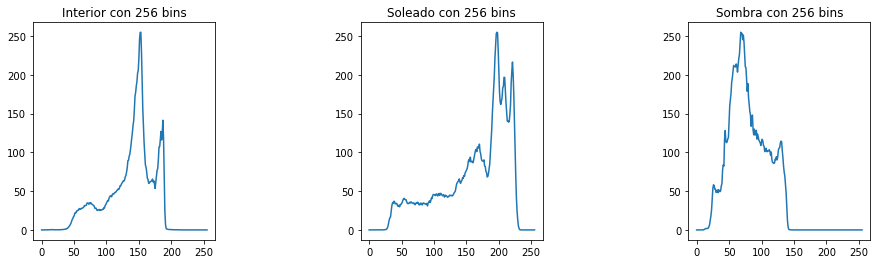

In [75]:
# Se establece la lista con la cantidad de bins que se quieren utilizar
bins = [2, 8, 16, 32, 256]

# Se llama a la función con cada valor de bin
for i in bins:
        histogramas(i)

* Se puede observar que la correlación disminuye en proporción a la cantidad de bins, aproximadamente con un factor de 1/2
* La chi cuadrado presenta valores muy altos a pesar de que los histogramas estan normalizados. Se observa que crece en proporción a la cantidad de bins.
* La intersección tembien presenta valores altos y de igual forma crece de acuerdo a la cantidad de bins.
* La Bhattacharyya varia poco dependiendo de la cantidad de bins, es la relación que mayor constancia presenta